# Deep-Learning Assignment 1.2

- Daniel Attali: 328780879
-

## Logisitc Regression

- Load the data
- Split the data
- Standardize the data
- Train the model
- Test the model
- Compare with buit in model


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-z))

#TODO: convert the sigmoid function to use iteration instead of vectorized operations
def sigmoid_iterative(z: np.ndarray) -> np.ndarray:
    result = np.zeros(z.shape[0])
    for i in range(z.shape[0]):
        result[i] = 1 / (1 + np.exp(-z[i]))
    return result

In [4]:
def loss(h: np.ndarray, y: np.ndarray) -> float:
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

#TODO: convert the loss function to use iteration instead of vectorized operations
def loss_iterative(h: np.ndarray, y: np.ndarray) -> float:
    result = 0
    for i in range(h.shape[0]):
        result += (-y[i] * np.log(h[i]) - (1 - y[i]) * np.log(1 - h[i]))
    return result / h.shape[0]

In [5]:
def predict_probs(X: np.ndarray, theta: np.ndarray) -> np.ndarray:
    return sigmoid(np.dot(X, theta))

In [6]:
def predict(X: np.ndarray, theta: np.ndarray, threshold: float = 0.5) -> int:
    if predict_probs(X, theta) >= threshold:
        return 1
    return 0

From here on it is our code

In [7]:
def load_data() -> pd.DataFrame:
    url = "https://github.com/rosenfa/nn/blob/master/pima-indians-diabetes.csv?raw=true"
    df_pima = pd.read_csv(url, header=0)
    return df_pima

In [8]:
def split_data(df_pima: pd.DataFrame) -> tuple[np.ndarray, np.ndarray]:
    """Spliting the data into attributes and target"""
    X = df_pima.iloc[:, :-1].values  # everything except the target
    y = df_pima.iloc[:, -1].values  # the target

    return X, y

In [9]:
def standardize(X: np.ndarray) -> np.ndarray:
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [10]:
def add_bias(X: np.ndarray) -> np.ndarray:
    return np.append(np.ones([len(X), 1]), X, 1)

This is the base model given to us as the base of the assignment

In [11]:
def train_model(X_train: np.ndarray, y_train: np.ndarray, theta: np.ndarray) -> tuple[np.ndarray, list]:
    # fit the data
    cost_array = (
        []
    )  # keeping a list of the cost at each iteration to make sure it is constantly decreasing
    iterations = 2000  # like the red arrow in slide 37
    lr = 0.01
    m, n = X_train.shape
    for i in range(iterations):
        Z = np.dot(X_train, theta)
        A = sigmoid(Z)  # also called h for 'hypothesis'
        Gradient = np.dot(X_train.T, (A - y_train)) / m
        theta -= lr * Gradient
        cost = loss(A, y_train)
        cost_array.append(cost)

    return theta, cost_array

In [12]:
def test_model(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> float:
    correct = 0
    for x, y in zip(X, y):
        p = predict(x, theta)
        if p == y:
            correct += 1

    # m = len(y)
    m = X.shape[0]
    accuracy = correct / m * 100
    return accuracy

In [13]:
def dot_product(X: np.ndarray, theta: np.ndarray) -> np.ndarray:
    # iterative version of the numpy dot product
    result = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            result[i] += X[i][j] * theta[j]
    return result

This is our custom model based on the one given to use going from `vector` math to `loops`

In [15]:
def train_model_iterative(X_train: np.ndarray, y_train: np.ndarray, theta: np.ndarray) -> tuple[np.ndarray, list]:
    """This function is doing exactly the same thing as the previous one, but it is using only built in python loops and not vectorized operations. This is to show the difference in speed between the two."""
    # fit the data
    cost_array = (
        []
    )  # keeping a list of the cost at each iteration to make sure it is constantly decreasing
    iterations = 2000  # like the red arrow in slide 37
    lr = 0.01
    m, n = X_train.shape
    for i in range(iterations):
        Z = dot_product(X_train, theta)

        # A = sigmoid(Z)
        A = sigmoid_iterative(Z)

        Gradient = np.zeros(n)
        for j in range(n):
            for k in range(m):
                Gradient[j] += X_train[k][j] * (A[k] - y_train[k]) / m

        # theta -= lr * Gradient
        for j in range(n):
            theta[j] -= lr * Gradient[j]

        # cost = loss(A, y_train)
        cost = loss_iterative(A, y_train)

        cost_array.append(cost)

    return theta, cost_array

Now We start building and testing the model using the above function

In [16]:
np.random.seed(42)

Setting up the seed for `np` for the purpes of testing

In [17]:
df_pima = load_data()
X, y = split_data(df_pima)
X = standardize(X)
X = add_bias(X)

In [18]:
theta = np.zeros(X.shape[1])

Init the theta

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0
)

In [21]:
theta, cost_array = train_model_iterative(X_train, y_train, theta)

Training our model

Ploting the result of the model

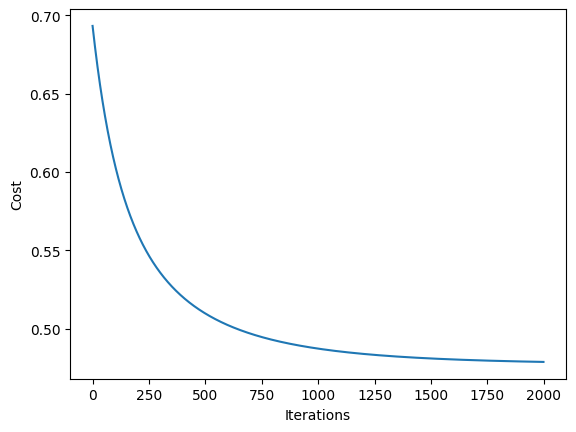

In [22]:
plt.plot(cost_array)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [23]:
accuracy = test_model(X_test, y_test, theta)
print(f"accuracy: {accuracy:.2f}%")

accuracy: 78.35%


Building the built in model from `sklearn` and testing it comparing to our own

In [24]:
sk_model = LogisticRegression()
sk_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
accuracy = sk_model.score(X_test, y_test) * 100
print(f"accuracy: {accuracy:.2f}%")

accuracy: 78.35%


In [26]:
print("Coefficients: \n", sk_model.coef_)
print(theta)

Coefficients: 
 [[-5.22722662e-06  3.41408152e-01  1.04483107e+00 -1.88267486e-01
   6.01205378e-02 -1.06103513e-01  6.68116721e-01  2.70641943e-01
   2.48208095e-01]]
[-0.78296934  0.30489631  0.94013631 -0.14493045  0.04133289 -0.05085305
  0.60542283  0.25583276  0.26702315]
